# Introducción

In [8]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [9]:
import warnings
import pandas as pd
warnings.filterwarnings("ignore", category=pd.core.common.SettingWithCopyWarning)

<div style="position: relative;">
    <img src="https://www.arcgis.com/sharing/rest/content/items/10bc2a493a974d5caf024ff13d7891b3/resources/images/widget_178/1622195050113.jpg" width="1100"/>
    <p style="color:white; font-size:36px; font-weight:bold; position:absolute; top:50px; left:120px;">Análisis de Siniestralidad |</p>
    <p style="color:white; font-size:20px; font-weight:bold; position:absolute; top:70px; left:580px;">Madrid</p>
    <p style="color:white; font-size:24px; position:absolute; top:100px; left:120px;">GIS & Spatial Data Science</p>    
</div>


<div style="position: relative;">
    <img src="https://media.licdn.com/dms/image/C5612AQHzwP87iXPCBA/article-inline_image-shrink_1500_2232/0/1595492940439?e=1692230400&v=beta&t=yaN2L0M58wNSNpAbyePhy0ok9ZPqHdzZVVuY8EY4Yr0" width="1100"/>
    <p style="color:black; font-size:36px; font-weight:bold; position:absolute; top:50px; left:120px;">Ciencia de datos ≈ Cocinar</p> 
</div>

<div style="text-align:center">
    <span style="font-size: 30px;"><strong>Análisis de Siniestralidad | Madrid</strong></span>
    <br>
    <span style="font-size: 20px;">GIS & Spatial Data Science</span>
</div>
 <br>
 <br>



<div style="text-align:center">
    <img src="https://d35fo82fjcw0y8.cloudfront.net/2016/07/03210504/infographic-chef-vs-analyst-01-01-3.jpg"/>
</div>


<div style="text-align:left">
    <span style="font-size: 20px;"><strong>Guía de estudio</strong></span>
</div>
<ol>
    <li>Procesamiento de datos (Ingesta, Limpieza, eliminar nulos, formatos correctos, duplicados,...)</li>
    <li>Exploración y visualización del dato (Análisis descriptivo: Graficos y mapas)</li>
    <li>Análisis Forense</li>
    <li>Análisis predictivo (modelo)</li>
    <li>Conclusión y comunicar los datos</li>
</ol>

# Procesamiento de datos

## Ingesta de datos


<div style="text-align:center">
    <img src="https://datos.gob.es/sites/default/files/styles/aporta_teaser/public/madrid.jpg?itok=OLlU2-mS" alt="drawing" width="200"/>
</div>

<div style="text-align:center">
    <a href="https://datos.madrid.es/sites/v/index.jsp?vgnextoid=7c2843010d9c3610VgnVCM2000001f4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD">VER PORTAL</a>
</div>

Links de descarga de los CSV:

- https://datos.madrid.es/egob/catalogo/300228-26-accidentes-trafico-detalle.csv

- https://datos.madrid.es/egob/catalogo/300228-24-accidentes-trafico-detalle.csv

- https://datos.madrid.es/egob/catalogo/300228-22-accidentes-trafico-detalle.csv

- https://datos.madrid.es/egob/catalogo/300228-21-accidentes-trafico-detalle.csv

- https://datos.madrid.es/egob/catalogo/300228-19-accidentes-trafico-detalle.csv

In [10]:
# Cargamos unos datos de muestra 
import pandas as pd

csv_2019 = 'C:\\00_Accidentes_Madrid\\datos\\2019_Accidentalidad.csv'
df_2019 = pd.read_csv(csv_2019, delimiter=";")
df_2019.head(3)
df_2019.shape

(51811, 19)

Impotamos todo los CSV de desde el año 2019 hasta el 2023 
Comprobamos la dimensiones de cada uno 

In [11]:
import os

# Obtener la ruta absoluta del directorio actual
dir_actual = os.getcwd()

# Ruta ruta relativa al archivo en la carpeta "datos"
mis_datos = "datos/"

# Lista de años
años = [2019, 2020, 2021, 2022, 2023]

# Lista para almacenar las dimensiones
dimensiones = []

# Obtener la ruta absoluta del directorio actual
current_dir = os.getcwd()

# Iterar sobre los años
for año in años:
    # Construir la ruta del archivo CSV
    ruta_csv = os.path.join(current_dir, mis_datos, f"{año}_Accidentalidad.csv")
    
    # Leer el archivo CSV para el año actual
    df = pd.read_csv(ruta_csv, delimiter=";")
    
    # Obtener las dimensiones del DataFrame
    filas, columnas = df.shape
    
    # Agregar las dimensiones a la lista
    dimensiones.append({'Año': año, 'Filas': filas, 'Columnas': columnas})

# Crear el DataFrame dimensiones_df usando pd.DataFrame()
dimensiones_df = pd.DataFrame(dimensiones)

# Imprimir el DataFrame con las dimensiones
dimensiones_df


,Año,Filas,Columnas
0,2019,51811,19
1,2020,32433,19
2,2021,41783,19
3,2022,47053,21
4,2023,16217,21


Vemos que no todos los dataframe tienen el mismo tamaño. 
Comprobanos el nombre de las columnas antes de unir las tablas.

## Limpieza de datos (Preparación, transformación)


<div style="text-align:center">
    <img src="./assets/Clean_data.png" alt="drawing" width="200"/>
</div>


In [12]:
# Visualizar todas las variables
import numpy as np

# Lista de años
años = [2019, 2020, 2021, 2022, 2023]

# Crear un diccionario para almacenar los nombres de variables de cada año
nombres_variables = {}

# Obtener la ruta absoluta del directorio actual
current_dir = os.getcwd()

# Iterar sobre los años
for año in años:
    # Construir la ruta del archivo CSV
    ruta_csv = os.path.join(current_dir, mis_datos, f"{año}_Accidentalidad.csv")
    
    # Leer el archivo CSV para el año actual
    df = pd.read_csv(ruta_csv, delimiter=";")
    
    # Obtener los nombres de las variables
    variables = df.columns.tolist()
    
    # Agregar los nombres de variables al diccionario
    nombres_variables[año] = variables

# Obtener la longitud máxima de nombres de variables
longitud_maxima = max(len(nombres) for nombres in nombres_variables.values())

# Rellenar las listas de nombres de variables con valores nulos para igualar la longitud
for año, nombres in nombres_variables.items():
    diferencia = longitud_maxima - len(nombres)
    nombres += [np.nan] * diferencia

# Crear el DataFrame nombres_variables_df usando pd.DataFrame()
nombres_variables_df = pd.DataFrame(nombres_variables)

# Imprimir el DataFrame con los nombres de las variables
nombres_variables_df


,2019,2020,2021,2022,2023
0,num_expediente,num_expediente,num_expediente,num_expediente,num_expediente
1,fecha,fecha,fecha,fecha,fecha
2,hora,hora,hora,hora,hora
3,localizacion,localizacion,localizacion,localizacion,localizacion
4,numero,numero,numero,numero,numero
5,cod_distrito,cod_distrito,cod_distrito,cod_distrito,cod_distrito
6,distrito,distrito,distrito,distrito,distrito
7,tipo_accidente,tipo_accidente,tipo_accidente,tipo_accidente,tipo_accidente
8,estado_meteorológico,estado_meteorológico,estado_meteorológico,estado_meteorológico,estado_meteorológico
9,tipo_vehiculo,tipo_vehiculo,tipo_vehiculo,tipo_vehiculo,tipo_vehiculo


In [13]:
# Lista de años
años = [2019, 2020, 2021, 2022, 2023]

# DataFrame para almacenar los datos seleccionados
df_total = pd.DataFrame()

# Obtener la ruta absoluta del directorio actual
current_dir = os.getcwd()

# Iterar sobre los años
for año in años:
    # Construir la ruta del archivo CSV
    ruta_csv = os.path.join(current_dir, mis_datos, f"{año}_Accidentalidad.csv")
    
    # Leer el archivo CSV para el año actual
    df = pd.read_csv(ruta_csv, delimiter=";")
    
    # Seleccionar las variables de índice 0 a 18
    df_seleccionado_año = df.iloc[:, 0:19]
    
    # Agregar los datos seleccionados al DataFrame total
    df_total = pd.concat([df_total, df_seleccionado_año], ignore_index=True)

# Imprimir los primeros registros del DataFrame seleccionado
print('Filas:', df_total.shape[0])
print('Variables:', df_total.shape[1])
df_total.head(3)

Filas: 189297
Variables: 19


,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga
0,2018S017842,04/02/2019,9:10:00,"CALL. ALBERTO AGUILERA, 1",1,1.0,CENTRO,Colisión lateral,Despejado,Motocicleta > 125cc,Conductor,De 45 a 49 años,Hombre,7.0,Asistencia sanitaria sólo en el lugar del acci...,"440068,049","4475679,17",N,NaN
1,2018S017842,04/02/2019,9:10:00,"CALL. ALBERTO AGUILERA, 1",1,1.0,CENTRO,Colisión lateral,Despejado,Turismo,Conductor,De 30 a 34 años,Mujer,7.0,Asistencia sanitaria sólo en el lugar del acci...,"440068,049","4475679,17",N,NaN
2,2019S000001,01/01/2019,3:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Furgoneta,Conductor,De 40 a 44 años,Hombre,NaN,NaN,"439139,603","4470836,854",S,NaN


### Info variables Numéricas y categóricas

In [14]:
# como se distribuyen las variables numéricas
df_total.describe()

,cod_distrito,cod_lesividad,positiva_droga
count,189291.000000,103840.000000,542.0
mean,9.895151,9.985622,1.0
std,5.639678,4.733800,0.0
min,1.000000,1.000000,1.0
25%,5.000000,7.000000,1.0
50%,10.000000,14.000000,1.0
75%,14.000000,14.000000,1.0
max,21.000000,77.000000,1.0


In [15]:
# como se comportan las variables categóricas
df_total.describe(include=['O'])

,num_expediente,fecha,hora,localizacion,numero,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol
count,189297,189297,189297,189297,189291,189291,189293,169395,188600,189294,189297,189297,103840,189290,189290,188627
unique,81132,1581,1411,44935,1661,21,13,7,40,3,18,3,9,71342,76737,2
top,2022S002867,05/04/2019,18:00:00,"AUTOV. M-30, +01100I",1,PUENTE DE VALLECAS,Colisión fronto-lateral,Despejado,Turismo,Conductor,Desconocido,Hombre,Sin asistencia sanitaria,"438909,004","4476421,943",N
freq,36,272,1691,378,18214,14955,47282,143488,131256,153155,20842,114516,56799,36,36,183127


### Valores nulos

In [16]:
#Verificar valores nulos
df_total.isnull().sum()

num_expediente               0
fecha                        0
hora                         0
localizacion                 0
numero                       6
cod_distrito                 6
distrito                     6
tipo_accidente               4
estado_meteorológico     19902
tipo_vehiculo              697
tipo_persona                 3
rango_edad                   0
sexo                         0
cod_lesividad            85457
lesividad                85457
coordenada_x_utm             7
coordenada_y_utm             7
positiva_alcohol           670
positiva_droga          188755
dtype: int64

In [17]:
# Eliminamos nulos de las coordenadas
df_total.dropna(subset=['coordenada_x_utm', 'coordenada_y_utm'], inplace=True)

# Rellenamos las celdas vacillas con 0
df_total.fillna(0, inplace=True)

In [18]:
#Verificar valores nulos
df_total.isnull().sum()

num_expediente          0
fecha                   0
hora                    0
localizacion            0
numero                  0
cod_distrito            0
distrito                0
tipo_accidente          0
estado_meteorológico    0
tipo_vehiculo           0
tipo_persona            0
rango_edad              0
sexo                    0
cod_lesividad           0
lesividad               0
coordenada_x_utm        0
coordenada_y_utm        0
positiva_alcohol        0
positiva_droga          0
dtype: int64

### Formato de la variables

In [19]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189290 entries, 0 to 189296
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   num_expediente        189290 non-null  object 
 1   fecha                 189290 non-null  object 
 2   hora                  189290 non-null  object 
 3   localizacion          189290 non-null  object 
 4   numero                189290 non-null  object 
 5   cod_distrito          189290 non-null  float64
 6   distrito              189290 non-null  object 
 7   tipo_accidente        189290 non-null  object 
 8   estado_meteorológico  189290 non-null  object 
 9   tipo_vehiculo         189290 non-null  object 
 10  tipo_persona          189290 non-null  object 
 11  rango_edad            189290 non-null  object 
 12  sexo                  189290 non-null  object 
 13  cod_lesividad         189290 non-null  float64
 14  lesividad             189290 non-null  object 
 15  

In [20]:
# Cambiar formato de la variable "fecha" a fecha
df_total['fecha'] = pd.to_datetime(df_total['fecha'], format='%d/%m/%Y')
#df_total['hora'] = pd.to_datetime(df_total['hora'], format='%H:%M:%S', errors='coerce').dt.time
df_total['hora'] = pd.to_datetime(df_total['hora'])

# Cambiar formato de las variables "coordenada_x_utm" y "coordenada_y_utm" a float
df_total['coordenada_x_utm'] = pd.to_numeric(df_total['coordenada_x_utm'].str.replace(',', '.'), errors='coerce')
df_total['coordenada_y_utm'] = pd.to_numeric(df_total['coordenada_y_utm'].str.replace(',', '.'), errors='coerce')
df_total['coordenada_x_utm'] = df_total['coordenada_x_utm'].astype(float)
df_total['coordenada_y_utm'] = df_total['coordenada_y_utm'].astype(float)

# Cambiar formato de la variable "cod_lesividad" a nuemeric
df_total['cod_lesividad'] = pd.to_numeric(df_total['cod_lesividad'], errors='coerce')



In [21]:
ruta_csv = os.path.join(current_dir, mis_datos, 'df_total.csv')
df_total.to_csv(ruta_csv, sep=';', index=False, encoding='latin1', decimal='.')
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189290 entries, 0 to 189296
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   num_expediente        189290 non-null  object        
 1   fecha                 189290 non-null  datetime64[ns]
 2   hora                  189290 non-null  datetime64[ns]
 3   localizacion          189290 non-null  object        
 4   numero                189290 non-null  object        
 5   cod_distrito          189290 non-null  float64       
 6   distrito              189290 non-null  object        
 7   tipo_accidente        189290 non-null  object        
 8   estado_meteorológico  189290 non-null  object        
 9   tipo_vehiculo         189290 non-null  object        
 10  tipo_persona          189290 non-null  object        
 11  rango_edad            189290 non-null  object        
 12  sexo                  189290 non-null  object        
 13 

### Eliminar Duplicados - Datos por número de expendiente

In [22]:
# Eliminar registros duplicados en la columna "num_expediente"
df_total_unicos = df_total.drop_duplicates(subset='num_expediente', keep='first')

# Guardar datos 
ruta_csv = os.path.join(current_dir, mis_datos, 'df_total_unicos.csv')
df_total_unicos.to_csv(ruta_csv, sep=';', index=False, encoding='latin1', decimal='.')
# Mostrar el DataFrame resultante
df_total_unicos


,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga
0,2018S017842,2019-02-04,2023-06-19 09:10:00,"CALL. ALBERTO AGUILERA, 1",1,1.0,CENTRO,Colisión lateral,Despejado,Motocicleta > 125cc,Conductor,De 45 a 49 años,Hombre,7.0,Asistencia sanitaria sólo en el lugar del acci...,440068.049,4475679.170,N,0.0
2,2019S000001,2019-01-01,2023-06-19 03:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,0,Furgoneta,Conductor,De 40 a 44 años,Hombre,0.0,0,439139.603,4470836.854,S,0.0
8,2019S000002,2019-01-01,2023-06-19 03:50:00,"CALL. CUART DE POBLET, 65",65,10.0,LATINA,Choque contra obstáculo fijo,Despejado,Furgoneta,Conductor,Desconocido,Desconocido,0.0,0,436473.789,4472030.489,N,0.0
12,2019S000003,2019-01-01,2023-06-19 04:00:00,"CALL. MARCELO USERA, 30",30,12.0,USERA,Colisión fronto-lateral,Despejado,Turismo,Conductor,De 30 a 34 años,Hombre,0.0,0,440462.407,4470926.552,S,0.0
16,2019S000004,2019-01-01,2023-06-19 04:00:00,"CALL. ISLA DE OZA, 15",15,9.0,MONCLOA-ARAVACA,Choque contra obstáculo fijo,Despejado,Turismo,Conductor,De 60 a 64 años,Hombre,0.0,0,438274.088,4479629.873,N,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189281,2023S017960,2023-04-30,2023-06-19 22:30:00,"AVDA. ENSANCHE DE VALLECAS, 44",44,18.0,VILLA DE VALLECAS,Colisión fronto-lateral,Despejado,Motocicleta hasta 125cc,Conductor,De 30 a 34 años,Hombre,2.0,Ingreso inferior o igual a 24 horas,448488.631,4468674.221,N,0.0
189284,2023S017978,2023-04-30,2023-06-19 05:10:00,CALLE LOPEZ DE HOLLOS CON CALLE PPE VERGARA,120,5.0,CHAMARTÍN,Colisión fronto-lateral,Despejado,Turismo,Conductor,De 45 a 49 años,Hombre,0.0,0,442433.751,4476960.554,N,0.0
189289,2023S018017,2023-04-28,2023-06-19 19:36:00,CALL. MONTANA / CALL. ADORA,2,12.0,USERA,Colisión lateral,Nublado,Turismo,Conductor,De 21 a 24 años,Hombre,0.0,0,441667.701,4468990.513,N,0.0
189291,2023S018331,2023-04-23,2023-06-19 14:00:00,"PLAZA. INDEPENDENCIA, 1",1,4.0,SALAMANCA,Otro,Despejado,Ciclomotor,Conductor,De 30 a 34 años,Hombre,0.0,0,441512.687,4474614.835,N,0.0


# Visualización y Exploración de los datos

<div style="display: flex; justify-content: center; align-items: center;">
    <img src="./assets/data_visualisation.png" alt="drawing" width="200" style="margin-right: 10px;">
    <img src="./assets/Explore_data.png" alt="drawing" width="200" style="margin-left: 10px;">
</div>


## Granuralidad temporal (Gráfico)

### Distribución de los accidente a lo largo del tiempo

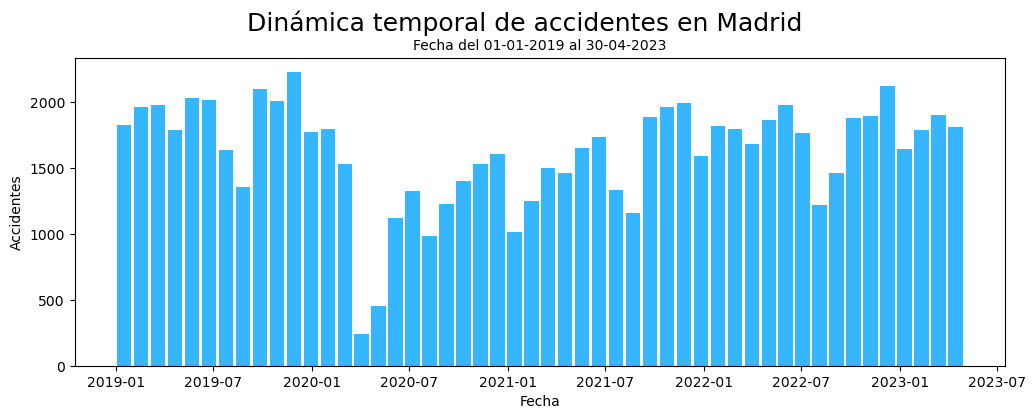

In [23]:
import matplotlib.pyplot as plt


# Configuración para mostrar el gráfico en el notebook
%matplotlib inline

# Crear el gráfico tipo histograma
plt.figure(figsize=(12, 4))  # Ajustar el ancho del gráfico
plt.hist(df_total_unicos['fecha'], bins=50, color='#35b6ff', rwidth=0.85)
plt.suptitle('Dinámica temporal de accidentes en Madrid', y=1, fontsize=18)
plt.title('Fecha del 01-01-2019 al 30-04-2023', fontsize=10)
plt.xlabel('Fecha')
plt.ylabel('Accidentes')

plt.show()


### Tuning del gráfico

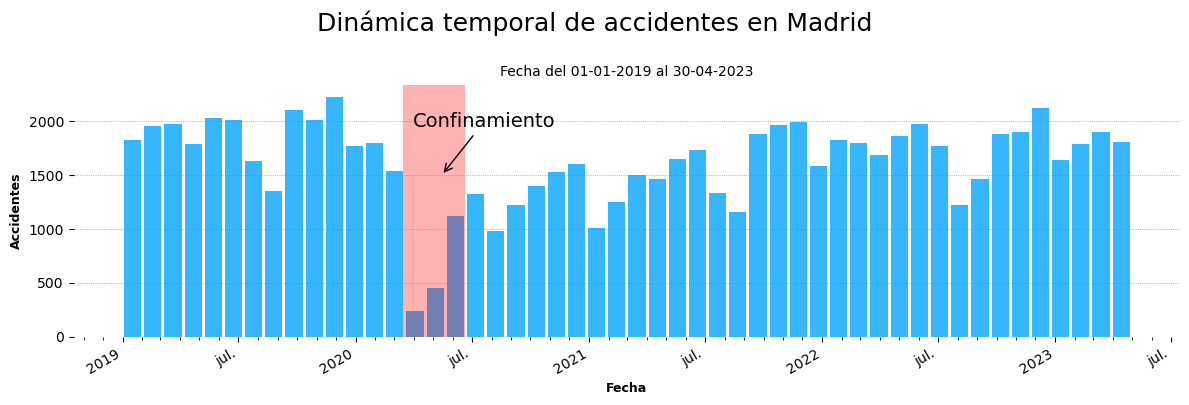

In [24]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as patches

def configurar_grafico():
    # Estilo gráfico
    plt.xticks(rotation=30, ha='right')  # Rotar y alinear las etiquetas del eje x para mejorar legibilidad
    plt.tight_layout()  # Ajustar el espacio entre los elementos del gráfico
    
    # Añadir líneas finas horizontales
    plt.grid(axis='y', color='gray', linestyle=':', linewidth=0.5)
    
    # Configurar los ejes de fecha
    ax = plt.gca()  # Obtener los ejes actuales
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))  # Establecer localizador de los principales ticks de mes
    ax.xaxis.set_minor_locator(mdates.MonthLocator())  # Establecer localizador de los ticks menores de mes
    ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))  # Establecer formato conciso para los principales ticks de fecha
    
    # Quitar el marco
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)


plt.figure(figsize=(12, 4))  # Ajustar el ancho del gráfico
plt.hist(df_total_unicos['fecha'], bins=50, color='#35b6ff', rwidth=0.85)
plt.suptitle('Dinámica temporal de accidentes en Madrid', y=1, fontsize=18)
plt.title('Fecha del 01-01-2019 al 30-04-2023', fontsize=10)
plt.xlabel('Fecha', fontsize=9, fontweight='bold')
plt.ylabel('Accidentes', fontsize=9, fontweight='bold')

# Configurar los ejes de fecha
ax = plt.gca()  # Obtener los ejes actuales
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))  # Establecer localizador de los principales ticks de mes
ax.xaxis.set_minor_locator(mdates.MonthLocator())  # Establecer localizador de los ticks menores de mes
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))  # Establecer formato conciso para los principales ticks de fecha

# Agregar rectángulo de confinamiento
start_date = '2020-03-15'
end_date = '2020-06-21'
rectangle = patches.Rectangle((mdates.datestr2num(start_date), 0), mdates.datestr2num(end_date) - mdates.datestr2num(start_date), plt.ylim()[1], facecolor='red', alpha=0.3)
ax.add_patch(rectangle)

# Agregar etiqueta "confinamiento" con flecha curva
label_text = ax.annotate('Confinamiento', xy=(mdates.datestr2num('2020-05-15'), 1500), xytext=(mdates.datestr2num('2020-07-21'), 2000),
                          arrowprops=dict(arrowstyle='->'), ha='center', va='center', rotation=0, fontsize=14)



configurar_grafico()
plt.show()


### Accidentes por año

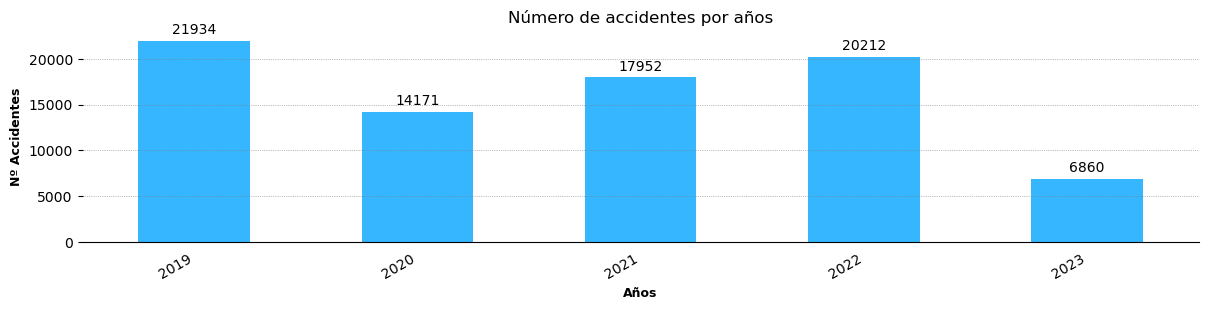

In [25]:
# Gráfico de barras para el número de accidentes por año
ax = df_total_unicos['fecha'].groupby(df_total_unicos.fecha.dt.year).agg('count').plot(
       kind='bar',  # Tipo de gráfico de barras
       color='#35b6ff',  # Color de las barras
       figsize=(12, 3) # Tamaño de la figura
)


# Estilo gráfico
plt.xticks(rotation=30, ha='right')  # Rotar y alinear las etiquetas del eje x para mejorar legibilidad
plt.tight_layout()  # Ajustar el espacio entre los elementos del gráfico
plt.title("Número de accidentes por años" , fontsize=12)
plt.xlabel('Años', y=2, fontsize=9, fontweight='bold') # Etiqueta del eje x con salto de línea
plt.ylabel('Nº Accidentes', fontsize=9, fontweight='bold') # Etiqueta del eje y

# Añadir líneas finas horizontales
plt.grid(axis='y', color='gray', linestyle=':', linewidth=0.5)


    
ax.tick_params(axis='x', which='both', bottom=False, top=False)  # Ocultar marcadores verticales en el eje x
# Quitar el marco
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Agregar etiquetas con el número de accidentes dentro de las barras
for rect in ax.containers[0]:
    height = rect.get_height()
    ax.annotate(str(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom')
    

    
    
plt.show()  # Mostrar el gráfico


### Accidentes por meses

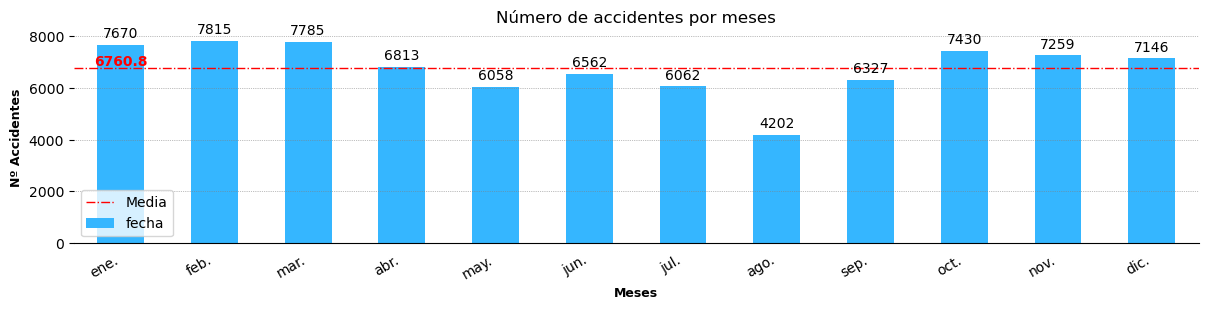

In [26]:
import calendar

# Obtener las abreviaturas de los meses
month_abbr = [calendar.month_abbr[i] for i in range(1, 13)]

# Gráfico de barras para el número de accidentes por año
ax = df_total_unicos['fecha'].groupby(df_total_unicos.fecha.dt.month).agg('count').plot(
       kind='bar',  # Tipo de gráfico de barras
       color='#35b6ff',  # Color de las barras
       figsize=(12, 3) # Tamaño de la figura
)

# Calcula la media de los accidentes
mean_accidents = df_total_unicos['fecha'].groupby(df_total_unicos.fecha.dt.month).agg('count').mean()

# Dibuja la línea discontinua roja para representar la media
ax.axhline(mean_accidents, color='red', linestyle='-.', label='Media', linewidth=1)

# Estilo de la etiqueta de la media
label_props = {'color': 'red', 'weight': 'bold', 'ha': 'center', 'va': 'bottom'}

# Agregar etiqueta con el valor de la media
ax.text(0, mean_accidents, f'{mean_accidents:.1f}', **label_props)

# Estilo gráfico
plt.xticks(range(12), month_abbr, rotation=30, ha='right')  # Usar las abreviaturas de los meses en el eje x
plt.tight_layout()  # Ajustar el espacio entre los elementos del gráfico
plt.title("Número de accidentes por meses", fontsize=12)
plt.xlabel('Meses', y=2, fontsize=9, fontweight='bold') # Etiqueta del eje x con salto de línea
plt.ylabel('Nº Accidentes', fontsize=9, fontweight='bold') # Etiqueta del eje y

# Añadir líneas finas horizontales
plt.grid(axis='y', color='gray', linestyle=':', linewidth=0.5)

ax.tick_params(axis='x', which='both', bottom=False, top=False)  # Ocultar marcadores verticales en el eje x
# Quitar el marco
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Agregar etiquetas con el número de accidentes dentro de las barras
for rect in ax.containers[0]:
    height = rect.get_height()
    ax.annotate(str(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom')

# Mostrar leyenda
ax.legend()

plt.show()  # Mostrar el gráfico


### Accidentes por días

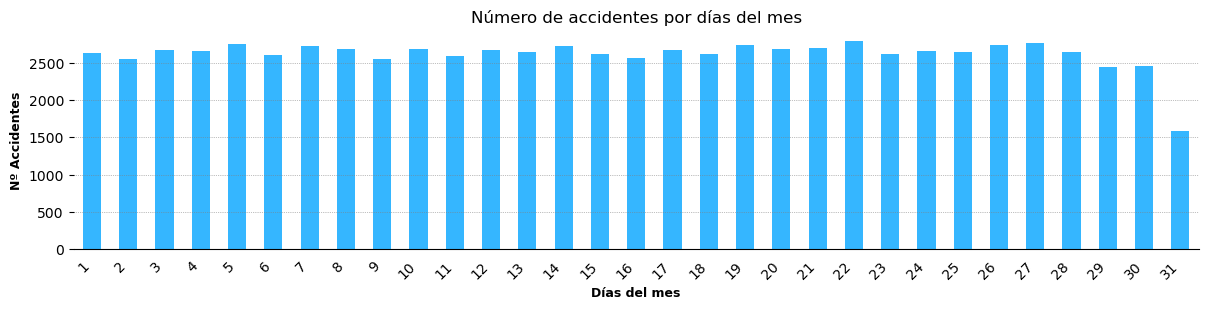

In [27]:
# Gráfico de barras para el número de accidentes por días del año
ax = df_total_unicos['fecha'].groupby(df_total_unicos.fecha.dt.day).agg('count').plot(
       kind='bar',  # Tipo de gráfico de barras
       color='#35b6ff',  # Color de las barras
       figsize=(12, 3) # Tamaño de la figura
)

# Estilo gráfico
plt.xticks(rotation=45, ha='right')  # Rotar y alinear las etiquetas del eje x para mejorar legibilidad
plt.tight_layout()  # Ajustar el espacio entre los elementos del gráfico
plt.title("Número de accidentes por días del mes", fontsize=12)
plt.xlabel('Días del mes', y=2, fontsize=9, fontweight='bold') # Etiqueta del eje x con salto de línea
plt.ylabel('Nº Accidentes', fontsize=9, fontweight='bold') # Etiqueta del eje y

# Añadir líneas finas horizontales
plt.grid(axis='y', color='gray', linestyle=':', linewidth=0.5)

ax.tick_params(axis='x', which='both', bottom=False, top=False)  # Ocultar marcadores verticales en el eje x
# Quitar el marco
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()  # Mostrar el gráfico


### Accidentes por horas

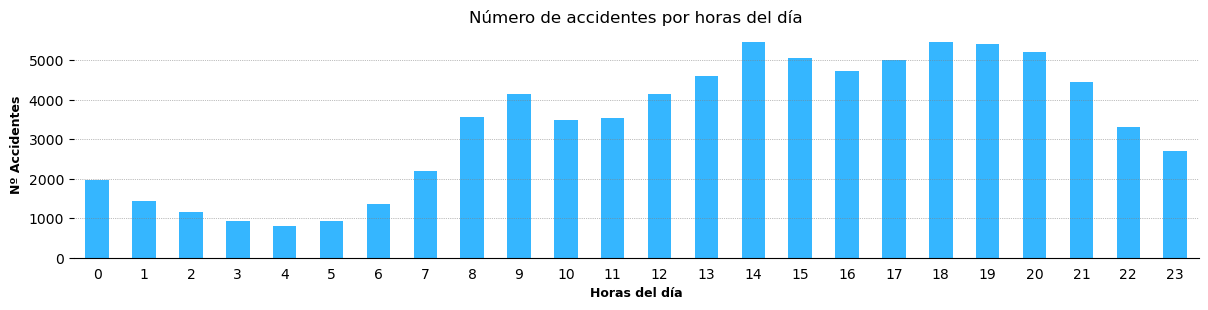

In [28]:
# Convertir la columna "hora" a cadena
df_total_unicos['hora'] = df_total_unicos['hora'].astype(str)

# Convertir la columna "hora" a tipo datetime
df_total_unicos['hora'] = pd.to_datetime(df_total_unicos['hora'], format='%Y-%m-%d %H:%M:%S')

# Agrupar por hora y contar el número de accidentes
accidentes_por_hora = df_total_unicos.groupby(df_total_unicos['hora'].dt.hour)['hora'].count()

# Crear el gráfico de barras
ax = accidentes_por_hora.plot(kind='bar', color='#35b6ff', figsize=(12, 3))

# Estilo gráfico
plt.xticks(rotation=0)  # No rotar las etiquetas del eje x
plt.tight_layout()
plt.title("Número de accidentes por horas del día", fontsize=12)
plt.xlabel('Horas del día', fontsize=9, fontweight='bold')
plt.ylabel('Nº Accidentes', fontsize=9, fontweight='bold')
plt.grid(axis='y', color='gray', linestyle=':', linewidth=0.5)

ax.tick_params(axis='x', which='both', bottom=False, top=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()


### Accidentes por minutos

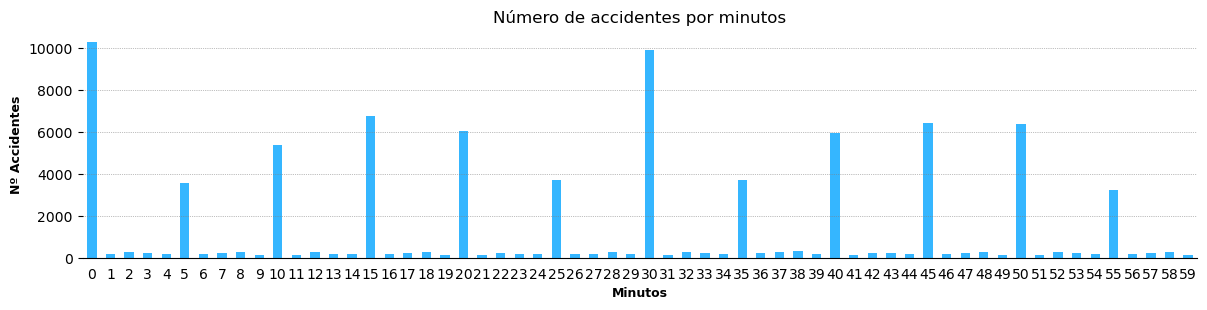

In [29]:
# Convertir la columna "hora" a tipo datetime
df_total_unicos['hora'] = pd.to_datetime(df_total_unicos['hora'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Obtener el componente de minutos de la columna "hora"
df_total_unicos['minutos'] = df_total_unicos['hora'].dt.minute

# Filtrar los valores nulos en la columna "minutos"
df_filtered = df_total_unicos.dropna(subset=['minutos'])

# Agrupar por minutos y contar el número de accidentes
accidentes_por_minuto = df_filtered.groupby(df_filtered['minutos'])['minutos'].count()

# Crear el gráfico de barras
ax = accidentes_por_minuto.plot(kind='bar', color='#35b6ff', figsize=(12, 3))

# Estilo gráfico
plt.xticks(rotation=0)
plt.tight_layout()
plt.title("Número de accidentes por minutos", fontsize=12)
plt.xlabel('Minutos', fontsize=9, fontweight='bold')
plt.ylabel('Nº Accidentes', fontsize=9, fontweight='bold')
plt.grid(axis='y', color='gray', linestyle=':', linewidth=0.5)

ax.tick_params(axis='x', which='both', bottom=False, top=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()


### Experience - Dashboard

<div style="text-align:center;">
    <img src="./assets/dashboard.png">
    <a href="https://experience.arcgis.com/experience/10bc2a493a974d5caf024ff13d7891b3/page/Visualizaci%C3%B3n-espacial/?views=Cibeles">Experience - Dashboard</a>
</div>


## Granularidad espacial (Mapa)

#### De cordenadas UTM a geometría 

In [30]:
#puntos_accidentes
puntos_accidentes = arcpy.management.CopyFeatures(r'C:\00_Documentos_ESRI\99_Mis_proyectos_ArcGIS_Pro\Análisis de Siniestralidad - Madrid\datos\outputs\puntos_accidentes.shp', 'puntos_accidentes')

#### Densidad accidentes

In [32]:
mapa_densidad = arcpy.sa.KernelDensity(
    in_features="puntos_accidentes",
    population_field="NONE",
    cell_size=10,
    search_radius=None,
    area_unit_scale_factor="SQUARE_KILOMETERS",
    out_cell_values="DENSITIES",
    method="PLANAR",
    in_barriers=None
)



In [ ]:
# Eliminar la capa
#path_gdb = r"C:\00_Documentos_ESRI\99_Mis_proyectos_ArcGIS_Pro\Análisis de Siniestralidad - Madrid\Análisis de Siniestralidad - Madrid.gdb"
#Densidad = '\\mapa_densidad'
##########################
#arcpy.Delete_management(path_gdb+ Densidad)

#### Accidentes por Distritos

In [37]:
# Cargar Distritos y barrios
Distritos = arcpy.management.CopyFeatures(r'C:\00_Documentos_ESRI\99_Mis_proyectos_ArcGIS_Pro\Análisis de Siniestralidad - Madrid\datos\Shapefile\Distritos_Madrid\Distritos.shp', 'Distritos')

Aplicamos una unión espacial (**Spatial Join**) con la capa de distritos

In [38]:
# Unión Espacial
################
path_gdb = r"C:\00_Documentos_ESRI\99_Mis_proyectos_ArcGIS_Pro\Análisis de Siniestralidad - Madrid\Análisis de Siniestralidad - Madrid.gdb"
accidentes_distritos = '\\Accidentes_Distritos'
############################################

arcpy.analysis.SpatialJoin(
    target_features= Distritos,
    join_features="puntos_accidentes",
    out_feature_class = path_gdb + accidentes_distritos,
    join_operation="JOIN_ONE_TO_ONE",
    join_type="KEEP_ALL",
    field_mapping='CODDIS "CODDIS" true true false 2 Text 0 0,First,#,Barrios,CODDIS,0,2;NOMDIS "NOMDIS" true true false 50 Text 0 0,First,#,Barrios,NOMDIS,0,50;COD_BAR "COD_BAR" true true false 3 Text 0 0,First,#,Barrios,COD_BAR,0,3;NOMBRE "NOMBRE" true true false 50 Text 0 0,First,#,Barrios,NOMBRE,0,50;Shape_Leng "Shape_Leng" true true false 8 Double 0 0,First,#,Barrios,Shape_Leng,-1,-1;COD_DIS_TX "COD_DIS_TX" true true false 2 Text 0 0,First,#,Barrios,COD_DIS_TX,0,2;BARRIO_MAY "BARRIO_MAY" true true false 50 Text 0 0,First,#,Barrios,BARRIO_MAY,0,50;COD_DISBAR "COD_DISBAR" true true false 3 Text 0 0,First,#,Barrios,COD_DISBAR,0,3;NUM_BAR "NUM_BAR" true true false 1 Text 0 0,First,#,Barrios,NUM_BAR,0,1;BARRIO_MT "BARRIO_MT" true true false 50 Text 0 0,First,#,Barrios,BARRIO_MT,0,50;COD_DISB "COD_DISB" true true false 4 Text 0 0,First,#,Barrios,COD_DISB,0,4;Shape_Length "Shape_Length" false true true 8 Double 0 0,First,#,Barrios,Shape_Length,-1,-1;Shape_Area "Shape_Area" false true true 8 Double 0 0,First,#,Barrios,Shape_Area,-1,-1;num_expedi "num_expedi" true true false 254 Text 0 0,First,#,puntos_accidentes,num_expedi,0,254;fecha "fecha" true true false 8 Date 0 0,First,#,puntos_accidentes,fecha,-1,-1;hora "hora" true true false 8 Date 0 0,First,#,puntos_accidentes,hora,-1,-1;localizaci "localizaci" true true false 254 Text 0 0,First,#,puntos_accidentes,localizaci,0,254;numero "numero" true true false 254 Text 0 0,First,#,puntos_accidentes,numero,0,254;cod_distri "cod_distri" true true false 19 Double 0 0,First,#,puntos_accidentes,cod_distri,-1,-1;distrito "distrito" true true false 254 Text 0 0,First,#,puntos_accidentes,distrito,0,254;tipo_accid "tipo_accid" true true false 254 Text 0 0,First,#,puntos_accidentes,tipo_accid,0,254;estado_met "estado_met" true true false 254 Text 0 0,First,#,puntos_accidentes,estado_met,0,254;tipo_vehic "tipo_vehic" true true false 254 Text 0 0,First,#,puntos_accidentes,tipo_vehic,0,254;tipo_perso "tipo_perso" true true false 254 Text 0 0,First,#,puntos_accidentes,tipo_perso,0,254;rango_edad "rango_edad" true true false 254 Text 0 0,First,#,puntos_accidentes,rango_edad,0,254;sexo "sexo" true true false 254 Text 0 0,First,#,puntos_accidentes,sexo,0,254;cod_lesivi "cod_lesivi" true true false 19 Double 0 0,First,#,puntos_accidentes,cod_lesivi,-1,-1;lesividad "lesividad" true true false 254 Text 0 0,First,#,puntos_accidentes,lesividad,0,254;coordenada "coordenada" true true false 19 Double 0 0,First,#,puntos_accidentes,coordenada,-1,-1;coordena_1 "coordena_1" true true false 19 Double 0 0,First,#,puntos_accidentes,coordena_1,-1,-1;positiva_a "positiva_a" true true false 254 Text 0 0,First,#,puntos_accidentes,positiva_a,0,254;positiva_d "positiva_d" true true false 19 Double 0 0,First,#,puntos_accidentes,positiva_d,-1,-1',
    match_option="INTERSECT",
    search_radius=None,
    distance_field_name=""
)

# Eliminar la capa
Distritos = '\\Distritos'
arcpy.Delete_management(path_gdb+ Distritos)

<Result 'true'>

#### Accidentes por Barrios

Aplicamos una unión espacial (**Spatial Join**) con la capa de barrios

In [36]:
#Barrios = arcpy.management.CopyFeatures(r'C:\00_Documentos_ESRI\99_Mis_proyectos_ArcGIS_Pro\Análisis de Siniestralidad - Madrid\datos\Shapefile\Barrios_Madrid\Barrios.shp', 'Barrios')
Barrios = r'C:\00_Documentos_ESRI\99_Mis_proyectos_ArcGIS_Pro\Análisis de Siniestralidad - Madrid\datos\Shapefile\Barrios_Madrid\Barrios.shp'
accidentes_barrios = '\\Accidentes_Barrios'
#########################################

arcpy.analysis.SpatialJoin(
    target_features= Barrios,
    join_features="puntos_accidentes",
    out_feature_class = path_gdb + accidentes_barrios,
    join_operation="JOIN_ONE_TO_ONE",
    join_type="KEEP_ALL",
    field_mapping='CODDIS "CODDIS" true true false 2 Text 0 0,First,#,Barrios,CODDIS,0,2;NOMDIS "NOMDIS" true true false 50 Text 0 0,First,#,Barrios,NOMDIS,0,50;COD_BAR "COD_BAR" true true false 3 Text 0 0,First,#,Barrios,COD_BAR,0,3;NOMBRE "NOMBRE" true true false 50 Text 0 0,First,#,Barrios,NOMBRE,0,50;Shape_Leng "Shape_Leng" true true false 8 Double 0 0,First,#,Barrios,Shape_Leng,-1,-1;COD_DIS_TX "COD_DIS_TX" true true false 2 Text 0 0,First,#,Barrios,COD_DIS_TX,0,2;BARRIO_MAY "BARRIO_MAY" true true false 50 Text 0 0,First,#,Barrios,BARRIO_MAY,0,50;COD_DISBAR "COD_DISBAR" true true false 3 Text 0 0,First,#,Barrios,COD_DISBAR,0,3;NUM_BAR "NUM_BAR" true true false 1 Text 0 0,First,#,Barrios,NUM_BAR,0,1;BARRIO_MT "BARRIO_MT" true true false 50 Text 0 0,First,#,Barrios,BARRIO_MT,0,50;COD_DISB "COD_DISB" true true false 4 Text 0 0,First,#,Barrios,COD_DISB,0,4;Shape_Length "Shape_Length" false true true 8 Double 0 0,First,#,Barrios,Shape_Length,-1,-1;Shape_Area "Shape_Area" false true true 8 Double 0 0,First,#,Barrios,Shape_Area,-1,-1;num_expedi "num_expedi" true true false 254 Text 0 0,First,#,puntos_accidentes,num_expedi,0,254;fecha "fecha" true true false 8 Date 0 0,First,#,puntos_accidentes,fecha,-1,-1;hora "hora" true true false 8 Date 0 0,First,#,puntos_accidentes,hora,-1,-1;localizaci "localizaci" true true false 254 Text 0 0,First,#,puntos_accidentes,localizaci,0,254;numero "numero" true true false 254 Text 0 0,First,#,puntos_accidentes,numero,0,254;cod_distri "cod_distri" true true false 19 Double 0 0,First,#,puntos_accidentes,cod_distri,-1,-1;distrito "distrito" true true false 254 Text 0 0,First,#,puntos_accidentes,distrito,0,254;tipo_accid "tipo_accid" true true false 254 Text 0 0,First,#,puntos_accidentes,tipo_accid,0,254;estado_met "estado_met" true true false 254 Text 0 0,First,#,puntos_accidentes,estado_met,0,254;tipo_vehic "tipo_vehic" true true false 254 Text 0 0,First,#,puntos_accidentes,tipo_vehic,0,254;tipo_perso "tipo_perso" true true false 254 Text 0 0,First,#,puntos_accidentes,tipo_perso,0,254;rango_edad "rango_edad" true true false 254 Text 0 0,First,#,puntos_accidentes,rango_edad,0,254;sexo "sexo" true true false 254 Text 0 0,First,#,puntos_accidentes,sexo,0,254;cod_lesivi "cod_lesivi" true true false 19 Double 0 0,First,#,puntos_accidentes,cod_lesivi,-1,-1;lesividad "lesividad" true true false 254 Text 0 0,First,#,puntos_accidentes,lesividad,0,254;coordenada "coordenada" true true false 19 Double 0 0,First,#,puntos_accidentes,coordenada,-1,-1;coordena_1 "coordena_1" true true false 19 Double 0 0,First,#,puntos_accidentes,coordena_1,-1,-1;positiva_a "positiva_a" true true false 254 Text 0 0,First,#,puntos_accidentes,positiva_a,0,254;positiva_d "positiva_d" true true false 19 Double 0 0,First,#,puntos_accidentes,positiva_d,-1,-1',
    match_option="INTERSECT",
    search_radius=None,
    distance_field_name=""
)

# Eliminar la capa
arcpy.Delete_management(path_gdb+ accidentes_distritos)
Barrios = '\\Barrios'
arcpy.Delete_management(path_gdb+ Barrios)



<Result 'true'>

In [38]:
# Eliminar la capa
arcpy.Delete_management(path_gdb+ accidentes_barrios)

<Result 'true'>

#### Accidentes en la red navegable (Carreteras)

Cargamos los datos la red de carreteras de **OSM**

<img src="./assets/accidentes_en_carretera.png">

In [74]:
Carreteras = arcpy.management.CopyFeatures(r'C:\00_Documentos_ESRI\99_Mis_proyectos_ArcGIS_Pro\Análisis de Siniestralidad - Madrid\datos\Shapefile\OSM_MADRID\gis_osm_roads_free_1.shp', 'Carreteras')
#Carreteras = r'C:\00_Documentos_ESRI\99_Mis_proyectos_ArcGIS_Pro\Análisis de Siniestralidad - Madrid\datos\Shapefile\OSM_MADRID\gis_osm_roads_free_1.shp'
accidentes_Carreteras = 'Accidentes_Carreteras'
###############################################


# Puntos de accidente cerca de la carreter
# Agregamos a la capa de Carreteras -> NEAR_FID NEAR_DIST
arcpy.analysis.Near(
    in_features="puntos_accidentes",
    near_features="Carreteras",
    search_radius=None,
    location="NO_LOCATION",
    angle="NO_ANGLE",
    method="PLANAR",
    field_names="NEAR_FID NEAR_FID;NEAR_DIST NEAR_DIST",
    distance_unit=""
)

# Agrupamos por campo NEAR_FID y contamos por NEAR_DIST
conteo_puntos_carratera = '\conteo_puntos_carratera'
#####################################################

arcpy.management.Dissolve(
    in_features="puntos_accidentes",
    out_feature_class = path_gdb + conteo_puntos_carratera,
    dissolve_field="NEAR_FID",
    statistics_fields="NEAR_DIST COUNT",
    multi_part="MULTI_PART",
    unsplit_lines="DISSOLVE_LINES",
    concatenation_separator=""
)

# Unimos las dos tablas
arcpy.management.JoinField(
    in_data="Carreteras",
    in_field="OBJECTID",
    join_table="conteo_puntos_carratera",
    join_field="NEAR_FID",
    fields=None,
    fm_option="NOT_USE_FM",
    field_mapping=None
)


<Result 'Carreteras'>

In [ ]:
# Eliminar la capa
#arcpy.Delete_management(path_gdb+ conteo_puntos_carratera)

# Eliminar la capa
#Carreteras = '\\Carreteras'
#arcpy.Delete_management(path_gdb+ Carreteras)

# Análisis Forense

## ¿Se producen más Atropellos cerca de colegios?

Nuestro siguiente estudio trabajará sobre las áreas de influencia de los colegios de Madrid. Para el presente análisis hemos usado tanto los colegios públicos como privados de educación infantil, primaria y secundaria del Municipio de Madrid, analizando un total de **1.505 colegios**.



### Nº de Atropellos en un área de 1 minuto andando 

In [49]:
# Coloegios Publicos y Privados.
colegios = arcpy.management.CopyFeatures(r'C:\00_Documentos_ESRI\99_Mis_proyectos_ArcGIS_Pro\Análisis de Siniestralidad - Madrid\datos\Shapefile\colegios_madrid_pu_pr_sf\colegios_madrid_pu_pr_sf.shp', 'Colegios')

In [17]:
# Cargamos la capa con el total de accidentes
#todos_accidentes = arcpy.management.CopyFeatures(r'C:\00_Documentos_ESRI\99_Mis_proyectos_ArcGIS_Pro\Análisis de Siniestralidad - Madrid\datos\outputs\todos_accidentes\todos_accidentes.shp', 'todos_accidentes')

In [52]:
# Selecciona de la variable tiop de accidente "Atropello a persona"
todos_accidentes = "\\puntos_accidentes"
todos_accidentes  = path_gdb + todos_accidentes

# Hacemos la selección de Atropello a persona sobre la capa de todos los accidentes
seleccion = arcpy.management.SelectLayerByAttribute(todos_accidentes , 
                                        "NEW_SELECTION",  
                                        # Definir la expresión de selección
                                        "tipo_accid = 'Atropello a persona'")



'''
arcpy.conversion.ExportFeatures(
    in_features="todos_accidentes_Layer1",
    out_features=r"C:\00_Documentos_ESRI\99_Mis_proyectos_ArcGIS_Pro\Análisis de Siniestralidad - Madrid\Análisis de Siniestralidad - Madrid.gdb\atropellos_persona",
    where_clause="",
    use_field_alias_as_name="NOT_USE_ALIAS",
    field_mapping='num_expediente "num_expediente" true true false 8000 Text 0 0,First,#,todos_accidentes_Layer1,num_expediente,0,8000;fecha "fecha" true true false 8 Date 0 0,First,#,todos_accidentes_Layer1,fecha,-1,-1;hora "hora" true true false 8 Date 0 0,First,#,todos_accidentes_Layer1,hora,-1,-1;localizacion "localizacion" true true false 8000 Text 0 0,First,#,todos_accidentes_Layer1,localizacion,0,8000;numero "numero" true true false 8000 Text 0 0,First,#,todos_accidentes_Layer1,numero,0,8000;cod_distrito "cod_distrito" true true false 8 Double 0 0,First,#,todos_accidentes_Layer1,cod_distrito,-1,-1;distrito "distrito" true true false 8000 Text 0 0,First,#,todos_accidentes_Layer1,distrito,0,8000;tipo_accidente "tipo_accidente" true true false 8000 Text 0 0,First,#,todos_accidentes_Layer1,tipo_accidente,0,8000;estado_meteorológico "estado_meteorológico" true true false 8000 Text 0 0,First,#,todos_accidentes_Layer1,estado_meteorológico,0,8000;tipo_vehiculo "tipo_vehiculo" true true false 8000 Text 0 0,First,#,todos_accidentes_Layer1,tipo_vehiculo,0,8000;tipo_persona "tipo_persona" true true false 8000 Text 0 0,First,#,todos_accidentes_Layer1,tipo_persona,0,8000;rango_edad "rango_edad" true true false 8000 Text 0 0,First,#,todos_accidentes_Layer1,rango_edad,0,8000;sexo "sexo" true true false 8000 Text 0 0,First,#,todos_accidentes_Layer1,sexo,0,8000;cod_lesividad "cod_lesividad" true true false 8 Double 0 0,First,#,todos_accidentes_Layer1,cod_lesividad,-1,-1;lesividad "lesividad" true true false 8000 Text 0 0,First,#,todos_accidentes_Layer1,lesividad,0,8000;coordenada_x_utm "coordenada_x_utm" true true false 8 Double 0 0,First,#,todos_accidentes_Layer1,coordenada_x_utm,-1,-1;coordenada_y_utm "coordenada_y_utm" true true false 8 Double 0 0,First,#,todos_accidentes_Layer1,coordenada_y_utm,-1,-1;positiva_alcohol "positiva_alcohol" true true false 8000 Text 0 0,First,#,todos_accidentes_Layer1,positiva_alcohol,0,8000;positiva_droga "positiva_droga" true true false 8 Double 0 0,First,#,todos_accidentes_Layer1,positiva_droga,-1,-1',
    sort_field=None
)

'''

# Deseleccionar todos los elementos
#arcpy.management.SelectLayerByAttribute(capa_accidentes, "CLEAR_SELECTION")#SWITCH_SELECTION

# Ruta de la geodatabase y nombre de la capa
path_gdb = r"C:\00_Documentos_ESRI\99_Mis_proyectos_ArcGIS_Pro\Análisis de Siniestralidad - Madrid\Análisis de Siniestralidad - Madrid.gdb"
# Obtener el número de filas de la capa
registros_totales = int(arcpy.GetCount_management("atropellos_persona").getOutput(0))


        
df = pd.DataFrame()
df["accidentes"] = ["Atropellos a persona Totals"]
df["Número"] = registros_totales
df

,accidentes,Número
0,Atropellos a persona Totals,12620


#### Area influencia a 1 minuto andando

In [53]:
# Area influencia a 1 minuto andando

Tiempo_andando = 1
area_colegio = '\\Área_colegio_'+str(Tiempo_andando)+'_min'
#####################################

# Añadimos el servicio de Áreas
Área_de_Influencia = arcpy.na.MakeServiceAreaAnalysisLayer(
    network_data_source=r"C:\Users\aaron.benchiheub\OneDrive - ESRI ESPAÑA Soluciones Geoespaciales S.L\Documentos\ArcGIS\Packages\Spain_972783\p14\europe.geodatabase\main.Routing\main.Routing_ND",
    layer_name="Área_de_Influencia",
    travel_mode="Walking Time", #Driving time, Driving Distance, Walking Time, Walking Distance, Rural Driving Distance, Rural Driving Time, Trucking Distance, Trucking Time
    travel_direction="FROM_FACILITIES",
    cutoffs=[Tiempo_andando],# Timpo 
    time_of_day=None,
    time_zone="LOCAL_TIME_AT_LOCATIONS",
    output_type="POLYGONS",
    polygon_detail="STANDARD",
    geometry_at_overlaps="OVERLAP",
    geometry_at_cutoffs="RINGS",
    polygon_trim_distance="100 Meters",
    exclude_sources_from_polygon_generation=None,
    accumulate_attributes=None,
    ignore_invalid_locations="SKIP"
)

# Añadimos los colegios al servicio 
arcpy.na.AddLocations(
    in_network_analysis_layer="Área_de_Influencia",
    sub_layer="Instalaciones",
    in_table="Colegios",
    field_mappings="Name # #;CurbApproach # 0;Attr_Minutes # 0;Attr_TravelTime # 0;Attr_Miles # 0;Attr_Kilometers # 0;Attr_TimeAt1KPH # 0;Attr_WalkTime # 0;Attr_TruckMinutes # 0;Attr_TruckTravelTime # 0;Breaks_Minutes # #;Breaks_TravelTime # #;Breaks_Miles # #;Breaks_Kilometers # #;Breaks_TimeAt1KPH # #;Breaks_WalkTime # #;Breaks_TruckMinutes # #;Breaks_TruckTravelTime # #",
    search_tolerance="5000 Meters",
    sort_field=None,
    search_criteria="main.Routing_Streets SHAPE;main.Custom_Streets SHAPE;main.Routing_Streets_Override NONE;main.Custom_Streets_Override SHAPE;main.Routing_ND_Junctions NONE",
    match_type="MATCH_TO_CLOSEST",
    append="APPEND",
    snap_to_position_along_network="NO_SNAP",
    snap_offset="5 Meters",
    exclude_restricted_elements="EXCLUDE",
    search_query=None,
    allow_auto_relocate=None
)

# Resolvemos 
arcpy.na.Solve(
    in_network_analysis_layer="Área_de_Influencia",
    ignore_invalids="SKIP",
    terminate_on_solve_error="TERMINATE",
    simplification_tolerance=None,
    overrides=""
)
# Exportamos la cápa de polígonos (áreas) resultante
arcpy.conversion.ExportFeatures(
    in_features=r"Área_de_Influencia\Polígonos",
    out_features=path_gdb + area_colegio,
    where_clause="",
    use_field_alias_as_name="NOT_USE_ALIAS",
    field_mapping=r'FacilityID "FacilityID" true true true 4 Long 0 0,First,#,Área_de_Influencia\Polígonos,FacilityID,-1,-1;Name "Name" true true true 1024 Text 0 0,First,#,Área_de_Influencia\Polígonos,Name,0,1024;FromBreak "FromBreak" true true true 8 Double 0 0,First,#,Área_de_Influencia\Polígonos,FromBreak,-1,-1;ToBreak "ToBreak" true true true 8 Double 0 0,First,#,Área_de_Influencia\Polígonos,ToBreak,-1,-1;Shape_Length "Shape_Length" false true true 8 Double 0 0,First,#,Área_de_Influencia\Polígonos,Shape_Length,-1,-1;Shape_Area "Shape_Area" false true true 8 Double 0 0,First,#,Área_de_Influencia\Polígonos,Shape_Area,-1,-1',
    sort_field=None
)
# Borrar servicio de cálculo de áreas de influencia
arcpy.na.DeleteNetworkAnalysisLayer('Área_de_Influencia')

<Result 'true'>

In [54]:
Área_colegio_1_min = arcpy.analysis.Clip(
    in_features="atropellos_persona",
    clip_features="Área_colegio_1_min",
    out_feature_class=r"C:\00_Documentos_ESRI\99_Mis_proyectos_ArcGIS_Pro\Análisis de Siniestralidad - Madrid\Análisis de Siniestralidad - Madrid.gdb\Atropellos_1min",
    cluster_tolerance=None
)
# Obtener el número de filas de la capa
registros_totales = int(arcpy.GetCount_management("Atropellos_1min").getOutput(0))
# Nuevo registro a agregar
nuevo_registro = {
    "accidentes": "Atropellos_1min",
    "Número": registros_totales
}
# Añadir el nuevo registro al DataFrame
df = df.append(nuevo_registro, ignore_index=True)
df

[54]:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,accidentes,Número
0,Atropellos a persona Totals,12620
1,Atropellos_1min,4516


#### Area de influencia 2 y 3 minutos andando

In [55]:
# Area de influencia 2 y 3 minutos andando

Tiempo_andando = 2
area_colegio = '\\Área_colegio_'+str(Tiempo_andando)+'_min'
#####################################

# Añadimos el servicio de Áreas
Área_de_Influencia = arcpy.na.MakeServiceAreaAnalysisLayer(
    network_data_source=r"C:\Users\aaron.benchiheub\OneDrive - ESRI ESPAÑA Soluciones Geoespaciales S.L\Documentos\ArcGIS\Packages\Spain_972783\p14\europe.geodatabase\main.Routing\main.Routing_ND",
    layer_name="Área_de_Influencia",
    travel_mode="Walking Time", #Driving time, Driving Distance, Walking Time, Walking Distance, Rural Driving Distance, Rural Driving Time, Trucking Distance, Trucking Time
    travel_direction="FROM_FACILITIES",
    cutoffs=[Tiempo_andando],# Timpo 
    time_of_day=None,
    time_zone="LOCAL_TIME_AT_LOCATIONS",
    output_type="POLYGONS",
    polygon_detail="STANDARD",
    geometry_at_overlaps="OVERLAP",
    geometry_at_cutoffs="RINGS",
    polygon_trim_distance="100 Meters",
    exclude_sources_from_polygon_generation=None,
    accumulate_attributes=None,
    ignore_invalid_locations="SKIP"
)

# Añadimos los colegios al servicio 
arcpy.na.AddLocations(
    in_network_analysis_layer="Área_de_Influencia",
    sub_layer="Instalaciones",
    in_table="Colegios",
    field_mappings="Name # #;CurbApproach # 0;Attr_Minutes # 0;Attr_TravelTime # 0;Attr_Miles # 0;Attr_Kilometers # 0;Attr_TimeAt1KPH # 0;Attr_WalkTime # 0;Attr_TruckMinutes # 0;Attr_TruckTravelTime # 0;Breaks_Minutes # #;Breaks_TravelTime # #;Breaks_Miles # #;Breaks_Kilometers # #;Breaks_TimeAt1KPH # #;Breaks_WalkTime # #;Breaks_TruckMinutes # #;Breaks_TruckTravelTime # #",
    search_tolerance="5000 Meters",
    sort_field=None,
    search_criteria="main.Routing_Streets SHAPE;main.Custom_Streets SHAPE;main.Routing_Streets_Override NONE;main.Custom_Streets_Override SHAPE;main.Routing_ND_Junctions NONE",
    match_type="MATCH_TO_CLOSEST",
    append="APPEND",
    snap_to_position_along_network="NO_SNAP",
    snap_offset="5 Meters",
    exclude_restricted_elements="EXCLUDE",
    search_query=None,
    allow_auto_relocate=None
)

# Resolvemos 
arcpy.na.Solve(
    in_network_analysis_layer="Área_de_Influencia",
    ignore_invalids="SKIP",
    terminate_on_solve_error="TERMINATE",
    simplification_tolerance=None,
    overrides=""
)
# Exportamos la cápa de polígonos (áreas) resultante
arcpy.conversion.ExportFeatures(
    in_features=r"Área_de_Influencia\Polígonos",
    out_features=path_gdb + area_colegio,
    where_clause="",
    use_field_alias_as_name="NOT_USE_ALIAS",
    field_mapping=r'FacilityID "FacilityID" true true true 4 Long 0 0,First,#,Área_de_Influencia\Polígonos,FacilityID,-1,-1;Name "Name" true true true 1024 Text 0 0,First,#,Área_de_Influencia\Polígonos,Name,0,1024;FromBreak "FromBreak" true true true 8 Double 0 0,First,#,Área_de_Influencia\Polígonos,FromBreak,-1,-1;ToBreak "ToBreak" true true true 8 Double 0 0,First,#,Área_de_Influencia\Polígonos,ToBreak,-1,-1;Shape_Length "Shape_Length" false true true 8 Double 0 0,First,#,Área_de_Influencia\Polígonos,Shape_Length,-1,-1;Shape_Area "Shape_Area" false true true 8 Double 0 0,First,#,Área_de_Influencia\Polígonos,Shape_Area,-1,-1',
    sort_field=None
)
# Borrar servicio de cálculo de áreas de influencia
arcpy.na.DeleteNetworkAnalysisLayer('Área_de_Influencia')


Área_colegio_2_min = arcpy.analysis.Clip(
    in_features="atropellos_persona",
    clip_features="Área_colegio_2_min",
    out_feature_class=r"C:\00_Documentos_ESRI\99_Mis_proyectos_ArcGIS_Pro\Análisis de Siniestralidad - Madrid\Análisis de Siniestralidad - Madrid.gdb\Atropellos_2min",
    cluster_tolerance=None
)
# Obtener el número de filas de la capa
registros_totales = int(arcpy.GetCount_management("Atropellos_2min").getOutput(0))
# Nuevo registro a agregar
nuevo_registro = {
    "accidentes": "Atropellos_2min",
    "Número": registros_totales
}
# Añadir el nuevo registro al DataFrame
df = df.append(nuevo_registro, ignore_index=True)

##############################
##############################

Tiempo_andando = 3
area_colegio = '\\Área_colegio_'+str(Tiempo_andando)+'_min'
#####################################

# Añadimos el servicio de Áreas
Área_de_Influencia = arcpy.na.MakeServiceAreaAnalysisLayer(
    network_data_source=r"C:\Users\aaron.benchiheub\OneDrive - ESRI ESPAÑA Soluciones Geoespaciales S.L\Documentos\ArcGIS\Packages\Spain_972783\p14\europe.geodatabase\main.Routing\main.Routing_ND",
    layer_name="Área_de_Influencia",
    travel_mode="Walking Time", #Driving time, Driving Distance, Walking Time, Walking Distance, Rural Driving Distance, Rural Driving Time, Trucking Distance, Trucking Time
    travel_direction="FROM_FACILITIES",
    cutoffs=[Tiempo_andando],# Timpo 
    time_of_day=None,
    time_zone="LOCAL_TIME_AT_LOCATIONS",
    output_type="POLYGONS",
    polygon_detail="STANDARD",
    geometry_at_overlaps="OVERLAP",
    geometry_at_cutoffs="RINGS",
    polygon_trim_distance="100 Meters",
    exclude_sources_from_polygon_generation=None,
    accumulate_attributes=None,
    ignore_invalid_locations="SKIP"
)

# Añadimos los colegios al servicio 
arcpy.na.AddLocations(
    in_network_analysis_layer="Área_de_Influencia",
    sub_layer="Instalaciones",
    in_table="Colegios",
    field_mappings="Name # #;CurbApproach # 0;Attr_Minutes # 0;Attr_TravelTime # 0;Attr_Miles # 0;Attr_Kilometers # 0;Attr_TimeAt1KPH # 0;Attr_WalkTime # 0;Attr_TruckMinutes # 0;Attr_TruckTravelTime # 0;Breaks_Minutes # #;Breaks_TravelTime # #;Breaks_Miles # #;Breaks_Kilometers # #;Breaks_TimeAt1KPH # #;Breaks_WalkTime # #;Breaks_TruckMinutes # #;Breaks_TruckTravelTime # #",
    search_tolerance="5000 Meters",
    sort_field=None,
    search_criteria="main.Routing_Streets SHAPE;main.Custom_Streets SHAPE;main.Routing_Streets_Override NONE;main.Custom_Streets_Override SHAPE;main.Routing_ND_Junctions NONE",
    match_type="MATCH_TO_CLOSEST",
    append="APPEND",
    snap_to_position_along_network="NO_SNAP",
    snap_offset="5 Meters",
    exclude_restricted_elements="EXCLUDE",
    search_query=None,
    allow_auto_relocate=None
)

# Resolvemos 
arcpy.na.Solve(
    in_network_analysis_layer="Área_de_Influencia",
    ignore_invalids="SKIP",
    terminate_on_solve_error="TERMINATE",
    simplification_tolerance=None,
    overrides=""
)
# Exportamos la cápa de polígonos (áreas) resultante
arcpy.conversion.ExportFeatures(
    in_features=r"Área_de_Influencia\Polígonos",
    out_features=path_gdb + area_colegio,
    where_clause="",
    use_field_alias_as_name="NOT_USE_ALIAS",
    field_mapping=r'FacilityID "FacilityID" true true true 4 Long 0 0,First,#,Área_de_Influencia\Polígonos,FacilityID,-1,-1;Name "Name" true true true 1024 Text 0 0,First,#,Área_de_Influencia\Polígonos,Name,0,1024;FromBreak "FromBreak" true true true 8 Double 0 0,First,#,Área_de_Influencia\Polígonos,FromBreak,-1,-1;ToBreak "ToBreak" true true true 8 Double 0 0,First,#,Área_de_Influencia\Polígonos,ToBreak,-1,-1;Shape_Length "Shape_Length" false true true 8 Double 0 0,First,#,Área_de_Influencia\Polígonos,Shape_Length,-1,-1;Shape_Area "Shape_Area" false true true 8 Double 0 0,First,#,Área_de_Influencia\Polígonos,Shape_Area,-1,-1',
    sort_field=None
)
# Borrar servicio de cálculo de áreas de influencia
arcpy.na.DeleteNetworkAnalysisLayer('Área_de_Influencia')

Área_colegio_3_min = arcpy.analysis.Clip(
    in_features="atropellos_persona",
    clip_features="Área_colegio_3_min",
    out_feature_class=r"C:\00_Documentos_ESRI\99_Mis_proyectos_ArcGIS_Pro\Análisis de Siniestralidad - Madrid\Análisis de Siniestralidad - Madrid.gdb\Atropellos_3min",
    cluster_tolerance=None
)
# Obtener el número de filas de la capa
registros_totales = int(arcpy.GetCount_management("Atropellos_3min").getOutput(0))
# Nuevo registro a agregar
nuevo_registro = {
    "accidentes": "Atropellos_3min",
    "Número": registros_totales
}
# Añadir el nuevo registro al DataFrame
df = df.append(nuevo_registro, ignore_index=True)
# Calcular el porcentaje en relación a "Atropellos a persona Totals"
df["porcentaje"] = round(df["Número"] / df.loc[0, "Número"] * 100, 2)
df


[55]:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
[55]:157: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,accidentes,Número,porcentaje
0,Atropellos a persona Totals,12620,100.00
1,Atropellos_1min,4516,35.78
2,Atropellos_2min,7064,55.97
3,Atropellos_3min,9370,74.25


#### Resulstaos Area de influencia 1, 2 y 3 minutos andando

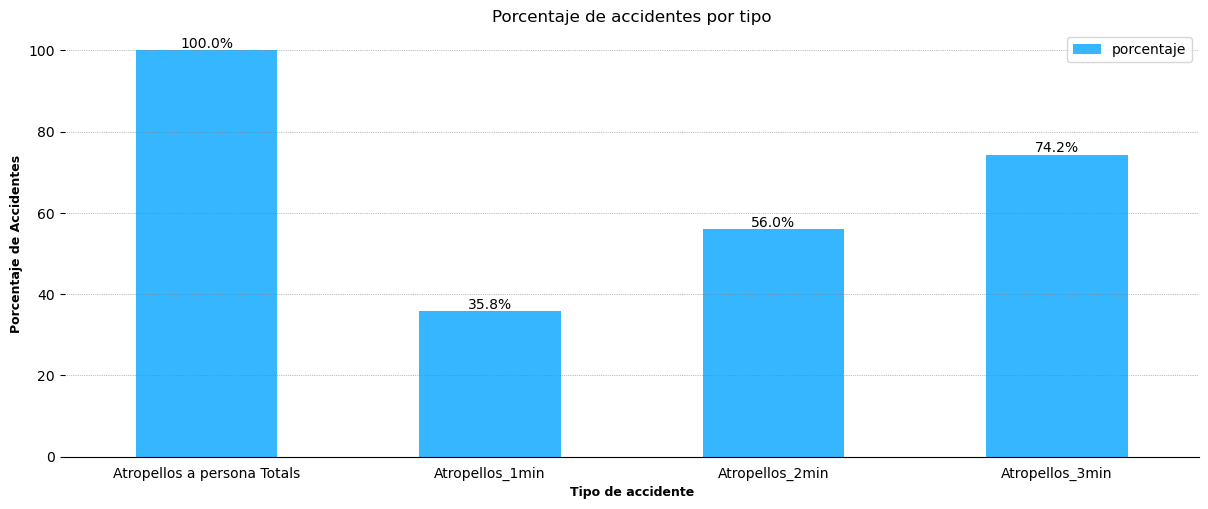

In [322]:
# Gráfico de barras
ax = df.plot(x="accidentes", y="porcentaje", kind="bar", color="#35b6ff", figsize=(12, 5))

# Añadir las etiquetas de porcentaje
for p in ax.patches:
    percentage = f"{p.get_height():.1f}%"
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha="center", va="bottom")

# Estilo gráfico
plt.xticks(rotation=0)  # No rotar las etiquetas del eje x
plt.tight_layout()  # Ajustar el espacio entre los elementos del gráfico
plt.title("Porcentaje de accidentes por tipo", fontsize=12)
plt.xlabel("Tipo de accidente", fontsize=9, fontweight="bold")
plt.ylabel("Porcentaje de Accidentes", fontsize=9, fontweight="bold")
plt.grid(axis="y", color="gray", linestyle=":", linewidth=0.5)

ax.tick_params(axis="x", which="both", bottom=False, top=False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

plt.show()  # Mostrar el gráfico



##### Borrar capas

# Análisis predictivo - Modelo

<div style="text-align:center">
    <img src="./assets/Modeling_data.png" alt="drawing" width="200"/>
</div>


## Cubos espacio-temporales | Análisis de puntos calientes emergentes con 

<div style="text-align:center">
<a href="https://pro.arcgis.com/en/pro-app/latest/tool-reference/space-time-pattern-mining/emerginghotspots.htm">Emerging Hot Spot Analysis (Space Time Pattern Mining)</a>

<img src="https://pro.arcgis.com/en/pro-app/latest/tool-reference/space-time-pattern-mining/GUID-3FE51525-E732-4FAB-80E2-71B866BECE61-web.png" alt="drawing" width="200"/>
<img src="https://pro.arcgis.com/en/pro-app/latest/tool-reference/space-time-pattern-mining/GUID-0FEECE1A-6B54-44B4-AE49-05E7EA849A8B-web.png" alt="drawing" width="200"/>
<img src="https://pro.arcgis.com/en/pro-app/latest/tool-reference/space-time-pattern-mining/GUID-42A31756-6518-41E9-A900-2C892AF4023A-web.png" alt="drawing" width="200"/>
</div>


Agregamos el códico de barrio a la capa de puntos **'COD_BAR'**

In [58]:
Barrios = arcpy.management.CopyFeatures(r'C:\00_Documentos_ESRI\99_Mis_proyectos_ArcGIS_Pro\Análisis de Siniestralidad - Madrid\datos\Shapefile\Barrios_Madrid\Barrios.shp', 'Barrios')
#puntos_accidentes = arcpy.management.CopyFeatures(r'C:\00_Documentos_ESRI\99_Mis_proyectos_ArcGIS_Pro\Análisis de Siniestralidad - Madrid\datos\outputs\puntos_accidentes.shp', 'puntos_accidentes')

### Visialización en 2 D

In [59]:
# Agregación de barrios en puntos
arcpy.analysis.SpatialJoin(
    target_features="puntos_accidentes",
    join_features="Barrios",
    out_feature_class=r"C:\00_Documentos_ESRI\99_Mis_proyectos_ArcGIS_Pro\Análisis de Siniestralidad - Madrid\datos\outputs\puntos_accidentes_COD_barrios.shp",
    join_operation="JOIN_ONE_TO_ONE",
    join_type="KEEP_ALL",
    field_mapping=None,
    match_option="INTERSECT",
    search_radius=None,
    distance_field_name=""
)


<Result 'C:\\00_Documentos_ESRI\\99_Mis_proyectos_ArcGIS_Pro\\Análisis de Siniestralidad - Madrid\\datos\\outputs\\puntos_accidentes_COD_barrios.shp'>

In [61]:
# Configuración de la herramientea cubo espacio temporales
cubo_accidentes = '\\cubo_accidentes.nc'
ruta = '\\datos\\outputs\\cubos_espacio_temporales'
path_gdb = r"C:\00_Documentos_ESRI\99_Mis_proyectos_ArcGIS_Pro\Análisis de Siniestralidad - Madrid"

############################################################

arcpy.stpm.CreateSpaceTimeCube(
    in_features="puntos_accidentes_COD_barrios",
    output_cube = path_gdb + ruta + cubo_accidentes,
    time_field="fecha",
    template_cube=None,
    time_step_interval=None,
    time_step_alignment="END_TIME",
    reference_time=None,
    distance_interval=None,
    summary_fields=None,
    aggregation_shape_type="HEXAGON_GRID",
    defined_polygon_locations=None,
    location_id=None
)

EmergingHotSpot_2d = '\\EmergingHotSpot_2d'
###########################################

arcpy.stpm.EmergingHotSpotAnalysis(
    in_cube = path_gdb + ruta + cubo_accidentes,
    analysis_variable="COUNT",
    output_features=path_gdb + ruta + EmergingHotSpot_2d,
    neighborhood_distance=None,
    neighborhood_time_step=1,
    polygon_mask=None,
    conceptualization_of_spatial_relationships="FIXED_DISTANCE",
    number_of_neighbors=None,
    define_global_window="ENTIRE_CUBE"
)

<Result 'C:\\00_Documentos_ESRI\\99_Mis_proyectos_ArcGIS_Pro\\Análisis de Siniestralidad - Madrid\\datos\\outputs\\cubos_espacio_temporales\\EmergingHotSpot_2d.shp'>

### Visialización en 3 D

In [62]:
EmergingHotSpot_3d = '\\EmergingHotSpot_3d'
###########################################

arcpy.stpm.VisualizeSpaceTimeCube3D(
    in_cube=path_gdb + ruta + cubo_accidentes,
    cube_variable="COUNT",
    display_theme="HOT_AND_COLD_SPOT_RESULTS",
    output_features=path_gdb + ruta + EmergingHotSpot_3d
)

<Result 'C:\\00_Documentos_ESRI\\99_Mis_proyectos_ArcGIS_Pro\\Análisis de Siniestralidad - Madrid\\datos\\outputs\\cubos_espacio_temporales\\EmergingHotSpot_3d.shp'>

## Serie temporal


Descomponemos la agregación de accientes en barrios y de forma temporal. Basado en los cubos espacio temporales

<div style="text-align:center">
<a href="https://pro.arcgis.com/en/pro-app/latest/tool-reference/space-time-pattern-mining/exponentialsmoothingforecast.htm">Exponential Smoothing Forecast (Space Time Pattern Mining)</a>

<img src="https://pro.arcgis.com/en/pro-app/latest/tool-reference/space-time-pattern-mining/GUID-DFD83A2B-94FB-4369-9485-5424D5351D60-web.png" alt="drawing" width="400"/>
</div>


### Serie temporal por barrios

In [63]:
# Cubo espaciotemporal barrios
arcpy.stpm.CreateSpaceTimeCubeDefinedLocations(
    in_features="Barrios",
    output_cube=r"C:\00_Documentos_ESRI\99_Mis_proyectos_ArcGIS_Pro\Análisis de Siniestralidad - Madrid\datos\outputs\cubos_espacio_temporales\cubo_serie_barrios.nc",
    location_id="COD_BAR",
    temporal_aggregation="APPLY_TEMPORAL_AGGREGATION",
    time_field="fecha",
    time_step_interval="1 Months",
    time_step_alignment="END_TIME",
    reference_time=None,
    variables=None,
    summary_fields="Join_Count SUM ZEROS",
    in_related_table="puntos_accidentes_COD_barrios",
    related_location_id="COD_BAR"
)

# Serie de tiempo por barrios
arcpy.stpm.VisualizeSpaceTimeCube2D(
    in_cube=r"C:\00_Documentos_ESRI\99_Mis_proyectos_ArcGIS_Pro\Análisis de Siniestralidad - Madrid\datos\outputs\cubos_espacio_temporales\cubo_serie_barrios.nc",
    cube_variable="JOIN_COUNT_SUM_ZEROS",
    display_theme="TRENDS",
    output_features=r"C:\00_Documentos_ESRI\99_Mis_proyectos_ArcGIS_Pro\Análisis de Siniestralidad - Madrid\datos\outputs\cubos_espacio_temporales\serie_tiempo_por_barrios.gdb\serie_tiempo_por_barrios",
    enable_time_series_popups="CREATE_POPUP"
)

<Result 'C:\\00_Documentos_ESRI\\99_Mis_proyectos_ArcGIS_Pro\\Análisis de Siniestralidad - Madrid\\datos\\outputs\\cubos_espacio_temporales\\serie_tiempo_por_barrios.gdb\\serie_tiempo_por_barrios'>

### Clustering serie temporal por barrios

<div style="text-align:center">
<a href="https://pro.arcgis.com/en/pro-app/latest/tool-reference/space-time-pattern-mining/time-series-clustering.htm">Time Series Clustering (Space Time Pattern Mining)</a>

<img src="https://pro.arcgis.com/en/pro-app/latest/tool-reference/space-time-pattern-mining/GUID-78899E30-876B-410E-9592-F3A663E8B4CD-web.png" alt="drawing" width="400"/>
</div>


In [73]:
arcpy.stpm.TimeSeriesClustering(
    in_cube=r"C:\00_Documentos_ESRI\99_Mis_proyectos_ArcGIS_Pro\Análisis de Siniestralidad - Madrid\datos\outputs\cubos_espacio_temporales\cubo_serie_barrios.nc",
    analysis_variable="JOIN_COUNT_SUM_ZEROS",
    output_features=r"C:\00_Documentos_ESRI\99_Mis_proyectos_ArcGIS_Pro\Análisis de Siniestralidad - Madrid\Análisis de Siniestralidad - Madrid.gdb\cubo_barrios_serie_tiempo_TimeSeriesClustering2",
    characteristic_of_interest="VALUE",
    cluster_count=3,
    output_table_for_charts=r"C:\00_Documentos_ESRI\99_Mis_proyectos_ArcGIS_Pro\Análisis de Siniestralidad - Madrid\Análisis de Siniestralidad - Madrid.gdb\tabla_cluster",
    shape_characteristic_to_ignore=None,
    enable_time_series_popups="CREATE_POPUP"
)

<Result 'C:\\00_Documentos_ESRI\\99_Mis_proyectos_ArcGIS_Pro\\Análisis de Siniestralidad - Madrid\\Análisis de Siniestralidad - Madrid.gdb\\cubo_barrios_serie_tiempo_TimeSeriesClustering2'>

### Predicción serie temporal por barrios

In [72]:
# Previsón de suavizazo exponencial
arcpy.stpm.ExponentialSmoothingForecast(
    in_cube=r"C:\00_Documentos_ESRI\99_Mis_proyectos_ArcGIS_Pro\Análisis de Siniestralidad - Madrid\datos\outputs\cubos_espacio_temporales\cubo_serie_barrios.nc",
    analysis_variable="JOIN_COUNT_SUM_ZEROS",
    output_features=r"C:\00_Documentos_ESRI\99_Mis_proyectos_ArcGIS_Pro\Análisis de Siniestralidad - Madrid\Análisis de Siniestralidad - Madrid.gdb\cubo_barrios_ExponentialSmoothingForecast",
    output_cube=r"C:\00_Documentos_ESRI\99_Mis_proyectos_ArcGIS_Pro\Análisis de Siniestralidad - Madrid\datos\outputs\cubos_espacio_temporales\cubo_barrios_serie_tiempo.nc",
    number_of_time_steps_to_forecast=4,
    season_length=4,
    number_for_validation=4,
    outlier_option="NONE",
    level_of_confidence="90%",
    maximum_number_of_outliers=2
)

<Result 'C:\\00_Documentos_ESRI\\99_Mis_proyectos_ArcGIS_Pro\\Análisis de Siniestralidad - Madrid\\Análisis de Siniestralidad - Madrid.gdb\\cubo_barrios_ExponentialSmoothingForecast'>

# Conclusiones

<div style="text-align:center">
    <img src="./assets/conclusiones.png"/>
</div>

<div style="position: relative;">
    <img src="https://www.arcgis.com/sharing/rest/content/items/10bc2a493a974d5caf024ff13d7891b3/resources/images/widget_178/1622195050113.jpg" width="1100"/>
    <p style="color:white; font-size:36px; font-weight:bold; position:absolute; top:50px; left:120px;">Análisis de Siniestralidad |</p>
    <p style="color:white; font-size:20px; font-weight:bold; position:absolute; top:70px; left:580px;">Madrid</p>
    <p style="color:white; font-size:24px; position:absolute; top:100px; left:120px;">GIS & Spatial Data Science</p>    
</div>
